# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os 
import csv
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [17]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="


weather_response = requests.get(query_url + city)
weather_json = weather_response.json()


In [20]:
city_df = []
country_df = []
date_df = []
lat_vol = []
lon_vol = []
temperature = []
humidity = []
cloudiness = []
wind_speed_df = []

In [21]:

processing_data = 1

# Loop Through List of Cities & Perform a Request for Data on Each city
for city in cities:

# Exception Handling
    try:
        response = requests.get(query_url + city).json()
        
        city_df.append(response["name"])
        
        country_df.append(response["sys"]["country"])
        date_df.append(response["dt"])
        lat_vol.append(response["coord"]["lat"])
        lon_vol.append(response["coord"]["lon"])
        temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed_df.append(response["wind"]["speed"])
        
        city_data = response["name"]
        
        print(f"searching for Record {processing_data} {city_data}")
        
         # Increase data Counter by 1 For Each Loop
        processing_data += 1
        
    except(KeyError):
        print("message: city not found") 
    continue


searching for Record 1 Guhāgar
searching for Record 2 Jamestown
searching for Record 3 Talnakh
searching for Record 4 Albany
message: city not found
searching for Record 5 Kapaa
searching for Record 6 Mataura
searching for Record 7 Goderich
searching for Record 8 Hobyo
searching for Record 9 Vaini
searching for Record 10 East London
searching for Record 11 Florence
searching for Record 12 Mossamedes
searching for Record 13 Rikitea
searching for Record 14 Cape Town
searching for Record 15 Bethel
searching for Record 16 Clyde River
searching for Record 17 Avera
searching for Record 18 Ambilobe
searching for Record 19 Tiksi
searching for Record 20 Hermanus
searching for Record 21 Khorinsk
searching for Record 22 Ribeira Grande
searching for Record 23 Talara
searching for Record 24 Lerwick
searching for Record 25 Bredasdorp
searching for Record 26 Bluff
searching for Record 27 Kruisfontein
searching for Record 28 Qaanaaq
searching for Record 29 Ponta do Sol
searching for Record 30 Arraial 

searching for Record 224 Katsuura
searching for Record 225 Kiryat Gat
searching for Record 226 Mayo
searching for Record 227 The Pas
searching for Record 228 Aykhal
searching for Record 229 Kavaratti
searching for Record 230 Bontang
searching for Record 231 Cherskiy
searching for Record 232 Rabo de Peixe
searching for Record 233 Buraidah
searching for Record 234 Pevek
searching for Record 235 Lorengau
searching for Record 236 Guerrero Negro
searching for Record 237 Baruun-Urt
searching for Record 238 Salalah
searching for Record 239 Shiraoi
searching for Record 240 Vila Franca do Campo
searching for Record 241 Paamiut
searching for Record 242 Dalbandin
searching for Record 243 Aitape
searching for Record 244 Cayhagan
searching for Record 245 Henties Bay
searching for Record 246 Necochea
searching for Record 247 Mareeba
searching for Record 248 Jijiga
searching for Record 249 Susuman
searching for Record 250 Palmer
searching for Record 251 Yei
message: city not found
searching for Recor

searching for Record 454 Baturaja
searching for Record 455 Sørland
searching for Record 456 São José do Belmonte
searching for Record 457 Walvis Bay
searching for Record 458 Harper
searching for Record 459 Santo Domingo
searching for Record 460 Teknāf
searching for Record 461 Golden
searching for Record 462 Kodoli
searching for Record 463 Chilca
message: city not found
searching for Record 464 Atar
searching for Record 465 Grand-Santi
searching for Record 466 Madridejos
searching for Record 467 Khorixas
searching for Record 468 Iskateley
searching for Record 469 Anori
searching for Record 470 Richards Bay
searching for Record 471 Province of Mantua
searching for Record 472 Aksarka
searching for Record 473 Kuli
searching for Record 474 Port Blair
searching for Record 475 West Monroe
searching for Record 476 Saint-Pierre
searching for Record 477 Mola di Bari
searching for Record 478 Fulton
searching for Record 479 Denpasar
searching for Record 480 Hirara
searching for Record 481 Yabassi


In [28]:
# weather_json

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [22]:
weather_dict = {
    "City": city_df,
    "Country": country_df,
    "Date": date_df,
    "Latitude": lat_vol,
    "Longitude": lon_vol,
    "Max Temperature": temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed_df
}

weather_df = pd.DataFrame(weather_dict)
weather_df.count()

City               559
Country            559
Date               559
Latitude           559
Longitude          559
Max Temperature    559
Humidity           559
Cloudiness         559
Wind Speed         559
dtype: int64

In [23]:
weather_df.head()

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Guhāgar,IN,1597804374,17.48,73.19,26.96,85,100,4.81
1,Jamestown,US,1597804374,42.10,-79.24,17.22,77,1,2.10
2,Talnakh,RU,1597804374,69.49,88.40,20.00,37,0,4.00
3,Albany,US,1597804375,42.60,-73.97,19.44,95,0,2.10
4,Kapaa,US,1597804376,22.08,-159.32,27.78,78,90,4.60


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [63]:
#  Get the indices of cities that have humidity over 100%.

In [30]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

weather_df_val = weather_df.dropna()

weather_df_val = weather_df_val.reset_index(drop=True)

weather_df_val["City"] = weather_df_val["City"]



In [26]:
# Extract relevant fields from the data frame
# Export the City_Data into a csv

#weather_df.to_csv("./ouput_data/weather_df.csv")
weather_df.to_csv("../output_data/weather_df.csv",index_label="City_ID")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

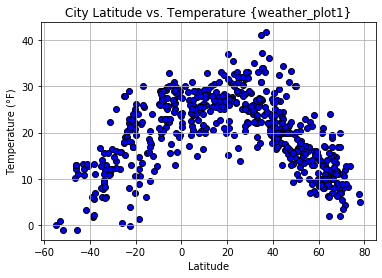

In [31]:


weather_plot1 = weather_df_val["Date"][0]

plt.scatter(weather_df_val["Latitude"], weather_df_val["Max Temperature"], facecolor="blue", marker="o",edgecolors='black')

# set graph properties
plt.title("City Latitude vs. Temperature {weather_plot1}")
plt.ylabel("Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the plot
plt.savefig("Temp_Latitude.png")
plt.show()


## Latitude vs. Humidity Plot

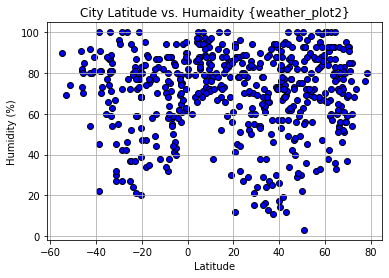

In [32]:
weather_plot2 = weather_df_val["Date"][0]

plt.scatter(weather_df_val["Latitude"], weather_df_val["Humidity"], facecolor="blue", marker="o",edgecolors='black')

# set graph properties
plt.title("City Latitude vs. Humaidity {weather_plot2}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the plot
plt.savefig("Humidity_Latitude.png")
plt.show()


## Latitude vs. Cloudiness Plot

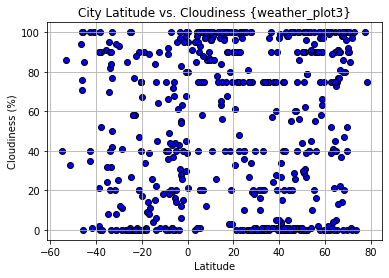

In [34]:
weather_plot3 = weather_df_val["Date"][0]

plt.scatter(weather_df_val["Latitude"], weather_df_val["Cloudiness"], facecolor="blue", marker="o",edgecolors='black')

# set graph properties
plt.title("City Latitude vs. Cloudiness {weather_plot3}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the plot
plt.savefig("Cloudiness_Latitude.png")
plt.show()


## Latitude vs. Wind Speed Plot

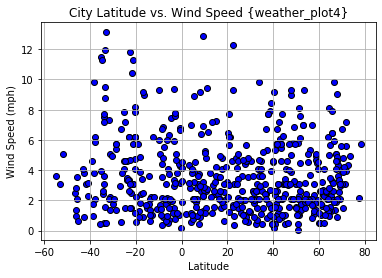

In [35]:
weather_plot4 = weather_df_val["Date"][0]

plt.scatter(weather_df_val["Latitude"], weather_df_val["Wind Speed"], facecolor="blue", marker="o",edgecolors='black')

# set graph properties
plt.title("City Latitude vs. Wind Speed {weather_plot4}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the plot
plt.savefig("Wind_Speed_Latitude.png")
plt.show()

## Linear Regression

In [37]:
# OPTIONAL: Create a function to create Linear Regression plots


In [36]:

def plot_lin_reg(x_value,y_value,xlbl,ylbl,lblpos,ifigure):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    
    regress_values = x_value * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_value,y_value)
    plt.plot(x_value,regress_values,"r-")
    
    plt.annotate(line_eq,lblpos,fontsize=14,color="blue")
    print(f"The r-squared is: {rvalue}")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    
    plt.savefig(f"fig{ifigure}.png")
    plt.show() 

In [44]:
# Create Northern and Southern Hemisphere DataFrames

hem_northern_df = weather_df_val.Latitude >= 0
hem_southtern_df = weather_df_val.Latitude < 0

weather_northern = weather_df_val[hem_northern_df]
weather_southern = weather_df_val[hem_southtern_df]

weather_northern = weather_northern.reset_index(drop=True)
weather_southern = weather_southern.reset_index(drop=True)


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.7207403301901767


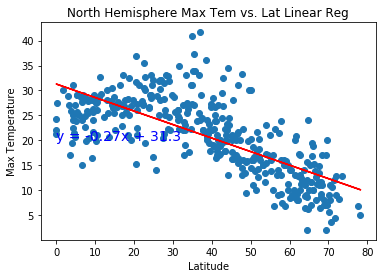

<Figure size 432x288 with 0 Axes>

In [54]:

xlbl = "Latitude"
ylbl = "Max Temperature"
lblpos = (0,20)
plt.title("North Hemisphere Max Tem vs. Lat Linear Reg")
plot_lin_reg(weather_northern[xlbl],weather_northern[ylbl],xlbl,ylbl,lblpos,1)
plt.savefig("Hem_reg fig1")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7249852233544805


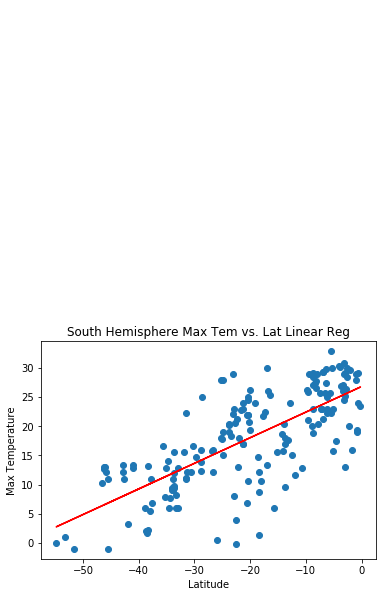

In [46]:
xlbl = "Latitude"
ylbl = "Max Temperature"
lblpos = (-45,90)
plt.title("South Hemisphere Max Tem vs. Lat Linear Reg")
plot_lin_reg(weather_southern[xlbl],weather_southern[ylbl],xlbl,ylbl,lblpos,2)




Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.0794739597180299


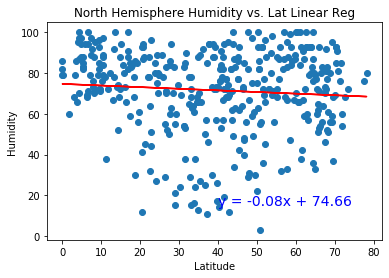

In [47]:
xlbl = "Latitude"
ylbl = "Humidity"
lblpos = (40,15)
plt.title("North Hemisphere Humidity vs. Lat Linear Reg")
plot_lin_reg(weather_northern[xlbl],weather_northern[ylbl],xlbl,ylbl,lblpos,3)


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.08000045884146577


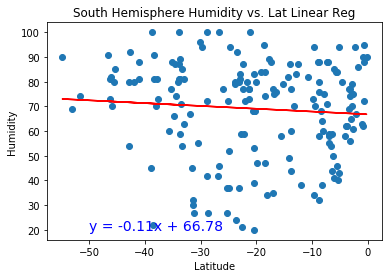

In [48]:
xlbl = "Latitude"
ylbl = "Humidity"
lblpos = (-50,20)
plt.title("South Hemisphere Humidity vs. Lat Linear Reg")
plot_lin_reg(weather_southern[xlbl],weather_southern[ylbl],xlbl,ylbl,lblpos,4)


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.09384893546045989


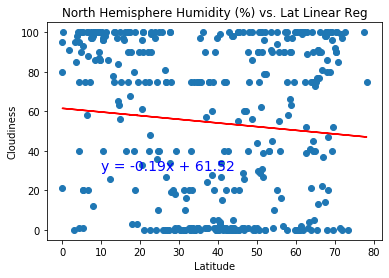

In [49]:
xlbl = "Latitude"
ylbl = "Cloudiness"
lblpos = (10,30)
plt.title("North Hemisphere Humidity (%) vs. Lat Linear Reg")
plot_lin_reg(weather_northern[xlbl],weather_northern[ylbl],xlbl,ylbl,lblpos,5)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.10157407157729223


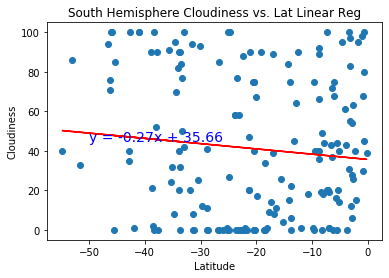

In [50]:
xlbl = "Latitude"
ylbl = "Cloudiness"
lblpos = (-50,45)
plt.title("South Hemisphere Cloudiness vs. Lat Linear Reg")
plot_lin_reg(weather_southern[xlbl],weather_southern[ylbl],xlbl,ylbl,lblpos,6)


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.026599292450586412


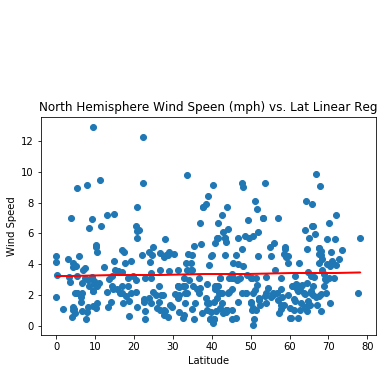

In [51]:
xlbl = "Latitude"
ylbl = "Wind Speed"
lblpos = (0,20)
plt.title("North Hemisphere Wind Speen (mph) vs. Lat Linear Reg")
plot_lin_reg(weather_northern[xlbl],weather_northern[ylbl],xlbl,ylbl,lblpos,7)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.07887046860813368


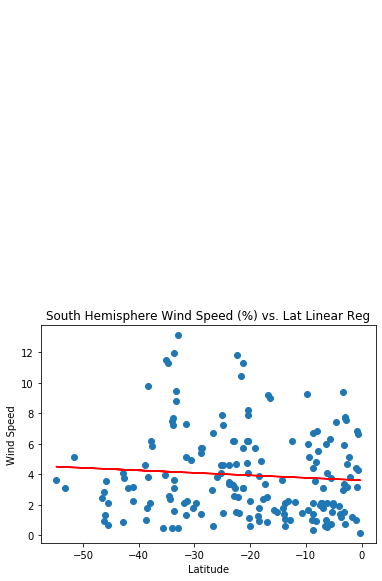

In [52]:
xlbl = "Latitude"
ylbl = "Wind Speed"
lblpos = (-20,34)
plt.title("South Hemisphere Wind Speed (%) vs. Lat Linear Reg")
plot_lin_reg(weather_southern[xlbl],weather_southern[ylbl],xlbl,ylbl,lblpos,8)

In [ ]:
Observations:
The temperature VS. latitude plot shows an increase of temperature with increase in latitude on Southern Hemisphere. 
There almost no relationship between humidity and level of temperature on both southern and northern Hemisphere. 
The data on wind speed vs. latitude also does not show any positive or negative relationship between wind speed and latitude. 

    